<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 2 Data Cleansing

Most data You'll come by will be messy in all kind of ways. There are missing observations which can be coded in different ways (cells beeing empty or containing an `None` value) or even observations, that are obviously wrong (age of 200 in the following example): 



In [1]:
import pandas as pd

data = {"Patient Id" : ["PID0x6418","PID0x6418","PID0x25d5","PID0x4a82","PID0x4ac8","PID0x1bf7"],	"Patient Age" : [10,10, 200,5,5,6], "Blood cell count (mcL)" : ["4.760603","4.760603", "4.910669", "4.893297", "4.893297", "4.720703"], "Patient First Name" : ["Richard", "Richard", "Mike", "Kimberly", "Jeffery", "Johanna"], "Family Name" : ["NaN","NaN", "NaN", "NaN", "Hoelscher", "" ], "Disorder Subclass" :[None, None, "Cystic fibrosis", "Diabetes", "diabetes", "Cancer"]}

df=pd.DataFrame(data)

df.head()


,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,NaN,None
1,PID0x6418,10,4.760603,Richard,NaN,None
2,PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes


## Getting a first overview

You can get an first impression of all the interval scaled data in the data frame, by using the ```info()``` and ```describe()``` functions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, PID0x6418 to PID0x1bf7
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient Age             5 non-null      float64
 1   Blood cell count (mcL)  5 non-null      object 
 2   Patient First Name      5 non-null      object 
 3   Family Name             5 non-null      object 
 4   Disorder Subclass       4 non-null      object 
dtypes: float64(1), object(4)
memory usage: 412.0+ bytes


In [ ]:
df.describe()

,Patient Age
count,6.000000
mean,39.333333
std,78.744312
min,5.000000
25%,5.250000
50%,8.000000
75%,10.000000
max,200.000000


Note that this only gives You information about the age, as this is the only interval scaled variable.

In [2]:
# Age is an integer
df["Patient Age"].dtype

dtype('int64')

In [4]:
# Blood cell count, however is object which is a kind of placeholder if the data type is not obvious
df["Blood cell count (mcL)"].dtype

dtype('O')

### Changing Data Types of Columns

There are differet [ways](https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/#:~:text=pandas%20Convert%20String%20to%20Float,float64%20%2C%20numpy) to change the data types of columns. Here we change the columns type to a float

In [5]:
df["Blood cell count (mcL)"] = pd.to_numeric(df["Blood cell count (mcL)"])
df["Blood cell count (mcL)"].dtype

dtype('float64')

Now, the description includes the Bloos cell count:

In [6]:
df.describe()

,Patient Age,Blood cell count (mcL)
count,6.000000,6.000000
mean,39.333333,4.823195
std,78.744312,0.084641
min,5.000000,4.720703
25%,5.250000,4.760603
50%,8.000000,4.826950
75%,10.000000,4.893297
max,200.000000,4.910669


To get a first overview on categorical data it is usefull to print unique values in the columns using the ```unique()``` function:

In [ ]:
df["Patient Id"].unique()

array(['PID0x6418', 'PID0x25d5', 'PID0x4a82', 'PID0x4ac8', 'PID0x1bf7'],
      dtype=object)

✍️ **Task**

Show the unique values of all colums. What irregularities do You find?

In [ ]:
for column in df.columns:
  print("In column {} we have:".format(column))
  print(df[column].unique())
  print("\n")

In column Patient Id we have:
['PID0x6418' 'PID0x25d5' 'PID0x4a82' 'PID0x4ac8' 'PID0x1bf7']


In column Patient Age we have:
[ 10 200   5   6]


In column Blood cell count (mcL) we have:
[4.760603 4.910669 4.893297 4.720703]


In column Patient First Name we have:
['Richard' 'Mike' 'Kimberly' 'Jeffery' 'Johanna']


In column Family Name we have:
['NaN' 'Hoelscher' '']


In column Disorder Subclass we have:
[None 'Cystic fibrosis' 'Diabetes' 'diabetes' 'Cancer']




We see the following:
- We have only 5 different patient IDs, even when we have 6 patients (IDs should be unique)
- Patient Age of 200 seems off
- Family Names have missing values coded in two different ways as `"NaN"` and `""`
- There are two spellings of Diabetes/diabetes

For even more info, we can use the ```value_counts()``` function:

In [ ]:
df["Disorder Subclass"].value_counts()

Cystic fibrosis    1
Diabetes           1
diabetes           1
Cancer             1
Name: Disorder Subclass, dtype: int64

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Dropping Rows in a DataFrame

If You want to omit certains rows in Your data, Your can use a filter and/or where clause like we did in the last lecture.

✍️ **Task**

Create a new data frame with only the "Cancer" Disorder Subclass

In [ ]:
df[df["Disorder Subclass"]=="Cancer"]

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
5,PID0x1bf7,6,4.720703,Johanna,,Cancer


### Dropping Duplicates

Another common problem are duplicates. You can find them using the [```duplicate```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) function.

In [7]:
df

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,NaN,None
1,PID0x6418,10,4.760603,Richard,NaN,None
2,PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,,Cancer


In [ ]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

✍️ **Task**

Remove the duplicate rows from the dataframe

*Hint*: Take a look in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) and use the return as a filter.

In [ ]:
data = {"Patient Id" : ["PID0x6418","PID0x6418","PID0x25d5","PID0x4a82","PID0x4ac8","PID0x1bf7"],	"Patient Age" : [10,10, 200,5,5,6], "Blood cell count (mcL)" : ["4.760603","4.760603", "4.910669", "4.893297", "4.893297", "4.720703"], "Patient First Name" : ["Richard", "Richard", "Mike", "Kimberly", "Jeffery", "Johanna"], "Family Name" : ["NaN","NaN", "NaN", "NaN", "Hoelscher", "" ], "Disorder Subclass" :[None, None, "Cystic fibrosis", "Diabetes", "diabetes", "Cancer"]}

df=pd.DataFrame(data)

df = df[df.duplicated(keep="first")==False]

df

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,NaN,None
2,PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,,Cancer


## Changing the Index of a DataFrame

Now, that we have unique patient Ids, we can use them as a new index:


In [ ]:
df = df.set_index("Patient Id")
df

,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
Patient Id,,,,,
PID0x6418,10,4.760603,Richard,NaN,None
PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
PID0x1bf7,6,4.720703,Johanna,,Cancer


Now, we can use the loc statement to access the observation using the key, a we did with dictionaries:

In [ ]:
df.loc["PID0x6418"]

Patient Age                     10
Blood cell count (mcL)    4.760603
Patient First Name         Richard
Family Name                    NaN
Disorder Subclass             None
Name: PID0x6418, dtype: object

### Removing Outliers

We realized that an age of 200 in not realistic. One common way to deal whith this is to replace the value with an average from the remaining data.

In [ ]:
mean_age = df['Patient Age'].mean()
mean_age

45.2

We can use ```.loc[]``` do chage this specific value:

In [ ]:
df.loc[df['Patient Age']>80,'Patient Age'] = mean_age
df

,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
Patient Id,,,,,
PID0x6418,10.0,4.760603,Richard,NaN,None
PID0x25d5,45.2,4.910669,Mike,NaN,Cystic fibrosis
PID0x4a82,5.0,4.893297,Kimberly,NaN,Diabetes
PID0x4ac8,5.0,4.893297,Jeffery,Hoelscher,diabetes
PID0x1bf7,6.0,4.720703,Johanna,,Cancer


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

✍️ **Task**

As the age of 45.2 still seems to be an outlier in that data set, replace the age of all the observations with an age older then 45 by 10:

In [ ]:
df.loc[df['Patient Age']>45,'Patient Age'] = 10
df

,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
Patient Id,,,,,
PID0x6418,10.0,4.760603,Richard,NaN,None
PID0x25d5,10.0,4.910669,Mike,NaN,Cystic fibrosis
PID0x4a82,5.0,4.893297,Kimberly,NaN,Diabetes
PID0x4ac8,5.0,4.893297,Jeffery,Hoelscher,diabetes
PID0x1bf7,6.0,4.720703,Johanna,,Cancer


### Removing Obeservations with missing data

If we have more than enough data at and in might be the best to remove observations with missing data. The fuction ```.dropna(how="any")``` removes all rows that contain a ```None``` value in any of the columns.



In [9]:
df.dropna(how="any")
df

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,NaN,None
1,PID0x6418,10,4.760603,Richard,NaN,None
2,PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,,Cancer


### Replacing and Filling missing values

We have diffent kinds of missing values. A missing Familiy Name is coded by an empty sting or "NaN", while an empty disorder subclass is coded by a ```None``` type. Only the ```None``` type values are real missing values, that are treated by the `dropna()` function.


In [ ]:
data = {"Patient Id" : ["PID0x6418","PID0x6418","PID0x25d5","PID0x4a82","PID0x4ac8","PID0x1bf7"],	"Patient Age" : [10,10, 200,5,5,6], "Blood cell count (mcL)" : ["4.760603","4.760603", "4.910669", "4.893297", "4.893297", "4.720703"], "Patient First Name" : ["Richard", "Richard", "Mike", "Kimberly", "Jeffery", "Johanna"], "Family Name" : ["NaN","NaN", "NaN", "NaN", "Hoelscher", "" ], "Disorder Subclass" :[None, None, "Cystic fibrosis", "Diabetes", "diabetes", "Cancer"]}

df=pd.DataFrame(data)

df.tail()

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
1,PID0x6418,10,4.760603,Richard,NaN,None
2,PID0x25d5,200,4.910669,Mike,NaN,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,NaN,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,,Cancer


To replace values in a data frame with other, we can use the ```replace``` function. As a parameter, we define a dictionary, that tells pandas, what keys to replace witgh which values:


In [ ]:
mapping = {"": None, "NaN": None}

df["Family Name"] = df["Family Name"].replace(mapping)
df

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,None,None
1,PID0x6418,10,4.760603,Richard,None,None
2,PID0x25d5,200,4.910669,Mike,None,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,None,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,None,Cancer


Now, that we have real empty values, we can use the missingno package to make a plot the the missing values:

The plot shows, that we have full data for all patients for the first four columns, but in the fifth column (Family Name) there is only one full observation:

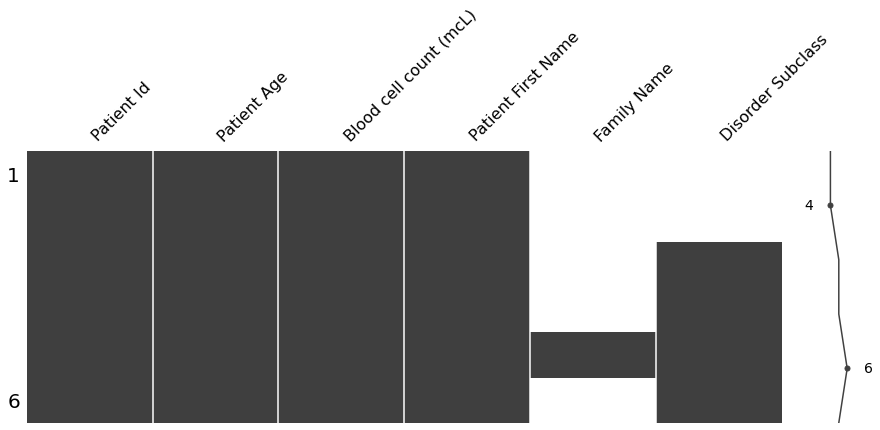

In [ ]:
import missingno as msno

msno.matrix(df,figsize=(15,5))


Now, that we have real empty values, we can replace then using the ```fillna()``` function:

In [ ]:
df.fillna("HERE IS NO DATA")

,Patient Id,Patient Age,Blood cell count (mcL),Patient First Name,Family Name,Disorder Subclass
0,PID0x6418,10,4.760603,Richard,HERE IS NO DATA,HERE IS NO DATA
1,PID0x6418,10,4.760603,Richard,HERE IS NO DATA,HERE IS NO DATA
2,PID0x25d5,200,4.910669,Mike,HERE IS NO DATA,Cystic fibrosis
3,PID0x4a82,5,4.893297,Kimberly,HERE IS NO DATA,Diabetes
4,PID0x4ac8,5,4.893297,Jeffery,Hoelscher,diabetes
5,PID0x1bf7,6,4.720703,Johanna,HERE IS NO DATA,Cancer


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

# 🏆 Case Study: Cleaning the disease data set

We use the disease [data](https://www.kaggle.com/code/brsdincer/genomes-and-genetics-disorder-eda-process-i/data) we used before.

You can download the ```train.csv``` file from sakai and upload it to the google Colab by clicking on the folder symbol to the left. Next, click on the arrow up symbol to upload the file.

After the upload You can use the ```.read_csv()``` function to create a data frame from the CSV-File.

Clean the data and create a report:
- Read the data
- Drop the following columns:
  - "Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2", "Symptom 3","Symptom 4","Symptom 5"
- How many columns are there left?
- What is the column with the most missing values?
- What are the three most common familiy names?
- Check the following colums and put in real ```None``` Values
  - "H/O radiation exposure (x-ray)"
  - "H/O substance abuse"
- How many observations are there for each different Disorder Subclass
- Check whether there are any irregularities in the inter scaled data


In [ ]:
# read the data
disease_data = pd.read_csv("train.csv",delimiter=",")

disease_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
# drop the following columns

disease_data = disease_data.drop(columns = ["Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2", "Symptom 3","Symptom 4","Symptom 5"])
disease_data.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender',
       'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
       'Place of birth', 'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

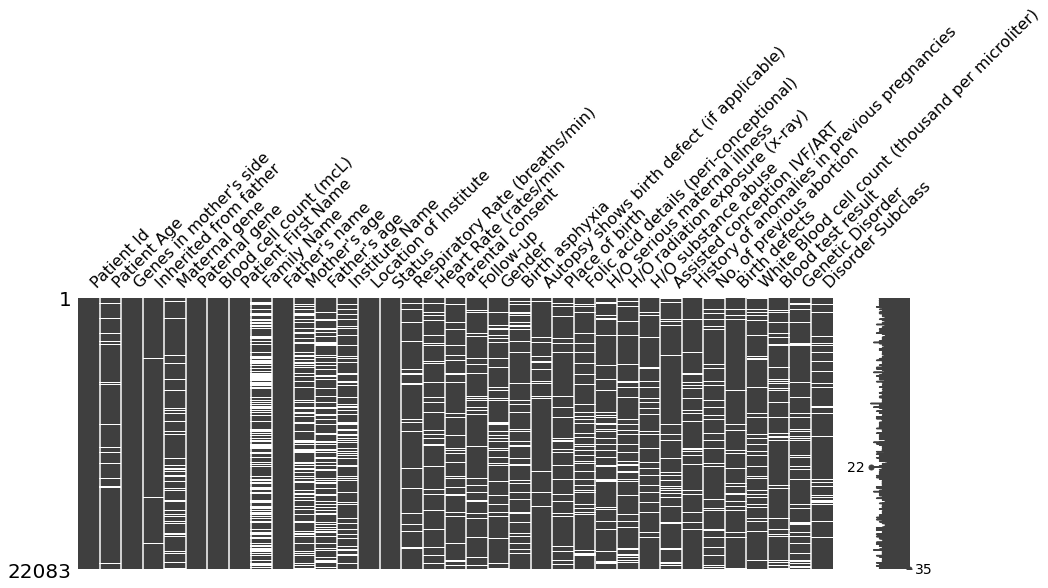

In [ ]:
# How many colums are there left?

import missingno as msno

msno.matrix(disease_data,figsize=(15,5))

In [ ]:
# What is the column with the most missing values?
disease_data.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Parental consent               

In [ ]:
# What are the three most common familiy names?
disease_data["Family Name"].value_counts()

Smith       157
Williams    106
Johnson      99
Brown        90
Jones        81
           ... 
Losey         1
Muldrow       1
Randell       1
Clouser       1
Mose          1
Name: Family Name, Length: 6282, dtype: int64

In [ ]:
# Check the following colums and put in real None Values
disease_data["H/O radiation exposure (x-ray)"].value_counts()

Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: H/O radiation exposure (x-ray), dtype: int64

In [ ]:
disease_data["H/O radiation exposure (x-ray)"] = disease_data["H/O radiation exposure (x-ray)"].replace({"Not applicable" : None})
disease_data["H/O radiation exposure (x-ray)"] = disease_data["H/O radiation exposure (x-ray)"].replace({"-": None})
disease_data["H/O radiation exposure (x-ray)"].value_counts()

No     5005
Yes    4980
Name: H/O radiation exposure (x-ray), dtype: int64

In [ ]:
disease_data["H/O substance abuse"].value_counts()

No     5033
Yes    4975
Name: H/O substance abuse, dtype: int64

In [ ]:
disease_data["H/O substance abuse"] = disease_data["H/O substance abuse"].replace({"Not applicable" : None})
disease_data["H/O substance abuse"] = disease_data["H/O substance abuse"].replace({"-": None})
disease_data["H/O substance abuse"].value_counts()

No     5033
Yes    4975
Name: H/O substance abuse, dtype: int64

In [ ]:
# How many observations are there for each different Disorder Subclass
print("Disorder_Subclass VALUES:\n")
print(disease_data["Disorder Subclass"].value_counts())

Disorder_Subclass VALUES:

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64


In [ ]:
# Check whether there are any irregularities in the inter scaled data
disease_data.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
count,20656.000000,22083.000000,16047.000000,16097.000000,19921.000000,19935.000000
mean,6.974148,4.898871,34.526454,41.972852,2.003062,7.486224
std,4.319475,0.199663,9.852598,13.035501,1.411919,2.653393
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.763109,26.000000,31.000000,1.000000,5.424703
50%,7.000000,4.899399,35.000000,42.000000,2.000000,7.477132
75%,11.000000,5.033830,43.000000,53.000000,3.000000,9.526152
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)